# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Cindy Alya Putri
- **Email:** cind.aly4@gmail.com
- **ID Dicoding:** cindyalyaputri

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Apakah ada perbedaan signifikan dalam pola penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana perbandingan penyewaan sepeda antara penyewa casual dan terdaftar?
- Bagaimana tren penyewaan sepeda dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Xraflessia/dicoding_project_analisis_data/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Xraflessia/dicoding_project_analisis_data/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kode di atas menggunakan fungsi pd.read_csv() untuk membaca file CSV dan .head() untuk menampilkan lima baris pertama dari dataset yang telah dimuat. Dari hasilnya, terlihat bahwa kedua tabel memiliki beberapa kolom utama, seperti tanggal, status hari kerja atau hari libur, musim, kondisi cuaca, suhu, serta jumlah penyewa sepeda baik yang terdaftar maupun tidak terdaftar.
- Dari sini, kita bisa menyimpulkan bahwa Bike Sharing Dataset adalah kumpulan data yang mencatat informasi tentang penyewaan sepeda. Dataset ini terdiri dari dua tabel utama:
  *   day.csv, yang menampilkan data penyewaan sepeda dalam skala harian.
  *   hour.csv, yang mencatat penyewaan sepeda berdasarkan jam.

### Assessing Data

In [6]:
print("jumlah duplikasi: ", day_df.duplicated().sum())
print("jumlah duplikasi: ", hour_df.duplicated().sum())

jumlah duplikasi:  0
jumlah duplikasi:  0


In [7]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Dari hasil pengecekan menggunakan .duplicated().sum(), terlihat bahwa jumlah duplikasi dalam dataset adalah 0. Artinya, tidak ada baris data yang terduplikasi, sehingga data yang digunakan sudah unik dan tidak memerlukan pembersihan terkait duplikasi.
- Dengan menggunakan .describe(), dapat terlihat statistik deskriptif dari dataset. Dari hasil ini, tidak ditemukan nilai yang mencurigakan atau anomali yang mencolok, seperti nilai minimum atau maksimum yang tidak masuk akal. Ini menunjukkan bahwa data dalam dataset tampak wajar dan siap untuk dianalisis lebih lanjut.
- Saat menjalankan .info(), terlihat bahwa kolom dteday masih memiliki tipe data object (string). Untuk mempermudah analisis berbasis waktu, kolom ini sebaiknya dikonversi ke format datetime agar bisa digunakan untuk pemrosesan tanggal, seperti ekstraksi tahun, bulan, atau analisis tren berdasarkan waktu.

### Cleaning Data

In [9]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Fungsi pd.to_datetime() digunakan untuk mengubah tipe data pada kolom dteday menjadi datetime, agar kolom tersebut dapat lebih mudah digunakan dalam analisis berbasis waktu, seperti ekstraksi hari, bulan, atau tahun.
- Setelah konversi, perintah .info() digunakan untuk mengecek struktur dataset. Dari hasilnya, terlihat bahwa kolom dteday telah berhasil diubah dari object menjadi datetime64[ns]

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
day_df.groupby(by="dteday").agg({
    "cnt": ["sum","max", "min", "mean"]
})

cnt                    
             sum   max   min    mean
dteday                              
2011-01-01   985   985   985   985.0
2011-01-02   801   801   801   801.0
2011-01-03  1349  1349  1349  1349.0
2011-01-04  1562  1562  1562  1562.0
2011-01-05  1600  1600  1600  1600.0
...          ...   ...   ...     ...
2012-12-27  2114  2114  2114  2114.0
2012-12-28  3095  3095  3095  3095.0
2012-12-29  1341  1341  1341  1341.0
2012-12-30  1796  1796  1796  1796.0
2012-12-31  2729  2729  2729  2729.0

[731 rows x 4 columns]

In [11]:
day_df.groupby(by="season").agg({
    "cnt": ["sum","max","min","mean"]
})

cnt                         
            sum   max   min         mean
season                                  
1        471348  7836   431  2604.132597
2        918589  8362   795  4992.331522
3       1061129  8714  1115  5644.303191
4        841613  8555    22  4728.162921

In [12]:
day_df.groupby(by="workingday").agg({
    "cnt": ["sum","max", "min", "mean","count" ]
})

cnt                              
                sum   max  min         mean count
workingday                                       
0           1000269  8714  605  4330.168831   231
1           2292410  8362   22  4584.820000   500

In [13]:
day_df.groupby(by=["workingday","season"]).agg({
    "cnt": ["sum","max", "min", "mean","count" ]
})

cnt                               
                      sum   max   min         mean count
workingday season                                       
0          1       137683  7836   605  2257.098361    61
           2       287976  8294   795  5142.428571    56
           3       312056  8714  1115  5474.666667    57
           4       262554  8555   627  4606.210526    57
1          1       333665  6312   431  2780.541667   120
           2       630613  8362  1471  4926.664062   128
           3       749073  8173  1842  5718.114504   131
           4       579059  8156    22  4785.611570   121

In [14]:
day_df.groupby(by=["dteday"]).agg({
    "casual": ["sum","max", "min", "mean"],
    "registered": ["sum","max", "min", "mean"]
})

casual                  registered                    
              sum  max  min   mean        sum   max   min    mean
dteday                                                           
2011-01-01    331  331  331  331.0        654   654   654   654.0
2011-01-02    131  131  131  131.0        670   670   670   670.0
2011-01-03    120  120  120  120.0       1229  1229  1229  1229.0
2011-01-04    108  108  108  108.0       1454  1454  1454  1454.0
2011-01-05     82   82   82   82.0       1518  1518  1518  1518.0
...           ...  ...  ...    ...        ...   ...   ...     ...
2012-12-27    247  247  247  247.0       1867  1867  1867  1867.0
2012-12-28    644  644  644  644.0       2451  2451  2451  2451.0
2012-12-29    159  159  159  159.0       1182  1182  1182  1182.0
2012-12-30    364  364  364  364.0       1432  1432  1432  1432.0
2012-12-31    439  439  439  439.0       2290  2290  2290  2290.0

[731 rows x 8 columns]

In [15]:
day_df.groupby(by=["holiday"]).agg({
    "casual": ["sum","max", "min", "mean"],
    "registered": ["sum","max", "min", "mean"]
})

casual                         registered                        
            sum   max  min         mean        sum   max  min         mean
holiday                                                                   
0        597658  3410    2   841.771831    2616586  6946   20  3685.332394
1         22359  3065  117  1064.714286      56076  5172  573  2670.285714

**Insight:**
- Dari analisis pertama, kita bisa melihat jumlah penyewaan sepeda per hari. Tidak terlihat adanya tren penurunan drastis dalam penyewaan harian, yang berarti jumlah penyewa cenderung stabil setiap harinya.
- Saat melihat pola penyewaan sepeda berdasarkan musim pada analisi kedua, terlihat bahwa musim semi (spring, kode 1) adalah periode dengan jumlah penyewaan terendah dibandingkan musim lainnya.
- Saat membandingkan jumlah penyewaan di hari kerja dan hari libur di analisis ketiga, terlihat bahwa sebagian besar penyewa lebih banyak melakukan penyewaan pada hari kerja dibandingkan hari libur.
- Ketika pada analisis keempat pola penyewaan dibagi berdasarkan musim dan hari kerja/libur, terlihat bahwa musim semi tetap menjadi musim dengan jumlah penyewaan paling rendah, baik pada hari kerja maupun hari libur.
- Saat membandingkan penyewaan berdasarkan jenis penyewa pada analisi kelima, terlihat perbedaan yang cukup mencolok antara penyewa terdaftar dan penyewa casual. Penyewa terdaftar jauh lebih banyak, mungkin karena mereka mendapatkan keuntungan seperti diskon atau promo yang lebih menarik dibandingkan penyewa casual.
- Ketika melihat pola penyewaan berdasarkan tipe penyewa (casual dan terdaftar) di hari kerja dan hari libur pada analisi keenam, terlihat bahwa baik penyewa casual maupun terdaftar lebih banyak menyewa sepeda pada hari kerja dibandingkan hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

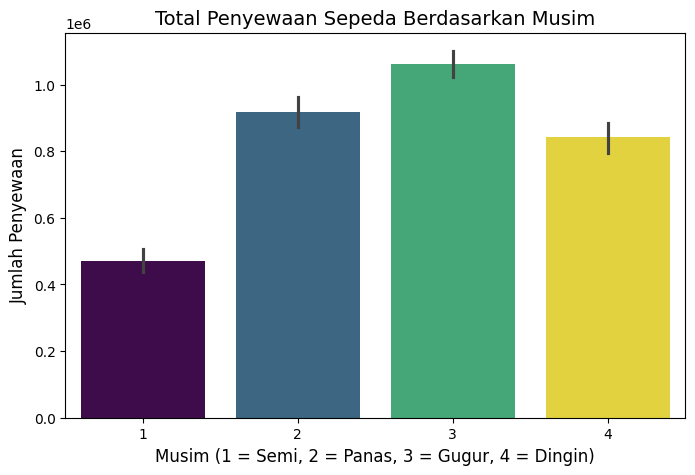

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(data=day_df, x="season", y="cnt", estimator=np.sum, hue="season", palette="viridis", legend=False)

plt.title("Total Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim (1 = Semi, 2 = Panas, 3 = Gugur, 4 = Dingin)", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)

plt.show()


**Insight:**
- Visualisasi ini menggunakan barplot untuk menampilkan total penyewaan sepeda di setiap musim.
- Musim mempengaruhi jumlah penyewaan sepeda secara signifikan. Dari visualisasi, terlihat bahwa musim semi memiliki jumlah penyewaan terendah dibandingkan musim lainnya.
- Faktor cuaca seperti hujan atau suhu dingin di musim semi mungkin menjadi penyebab rendahnya penyewaan.

### Pertanyaan 2: Apakah ada perbedaan signifikan dalam pola penyewaan sepeda antara hari kerja dan hari libur?

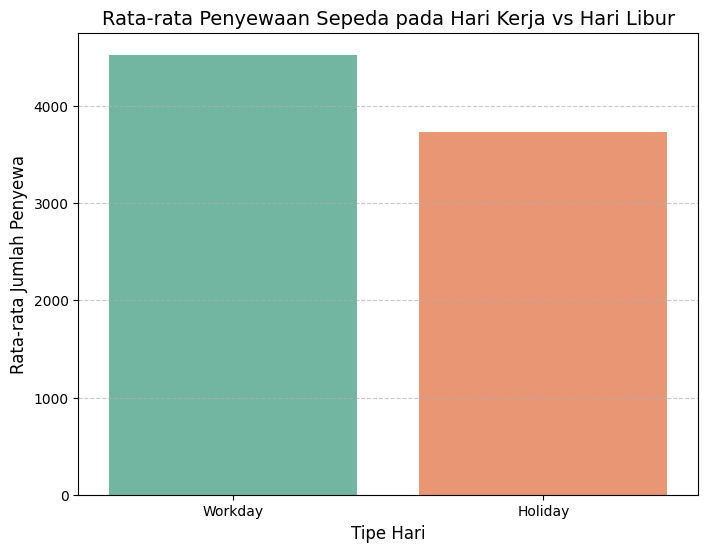

In [22]:
avg_usage_by_holiday = day_df.groupby('holiday')[['cnt']].mean().reset_index()

avg_usage_by_holiday['holiday'] = avg_usage_by_holiday['holiday'].map({0: 'Workday', 1: 'Holiday'})

plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='cnt', hue='holiday', data=avg_usage_by_holiday, palette='Set2', legend=False)

plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja vs Hari Libur', fontsize=14)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Insight:**
- Dari visualisasi, terlihat bahwa rata-rata penyewaan sepeda pada hari kerja lebih tinggi dibandingkan hari libur.
- Menunjukkan bahwa sepeda lebih sering digunakan sebagai moda transportasi untuk keperluan sehari-hari seperti bekerja atau sekolah, dibandingkan untuk rekreasi saat hari libur.
- Meskipun jumlah penyewaan pada hari libur lebih rendah, masih ada pengguna yang tetap menyewa sepeda, kemungkinan untuk aktivitas santai atau rekreasi.

### Pertanyaan 3: Bagaimana perbandingan penyewaan sepeda antara penyewa casual dan terdaftar?

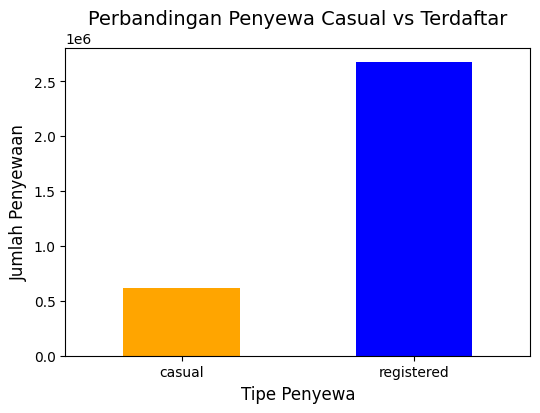

In [23]:
plt.figure(figsize=(6, 4))
day_df[['casual', 'registered']].sum().plot(kind='bar', color=['orange', 'blue'])

plt.title("Perbandingan Penyewa Casual vs Terdaftar", fontsize=14)
plt.xlabel("Tipe Penyewa", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=0)

plt.show()


**Insight:**
- Penyewa terdaftar jauh lebih dominan dibanding penyewa casual.
- Hal ini dapat mengindikasikan bahwa loyalitas pelanggan cukup tinggi, atau pengguna lebih memilih langganan karena keuntungan seperti diskon atau akses mudah.

### Pertanyaan 4: Bagaimana tren penyewaan sepeda dari waktu ke waktu?

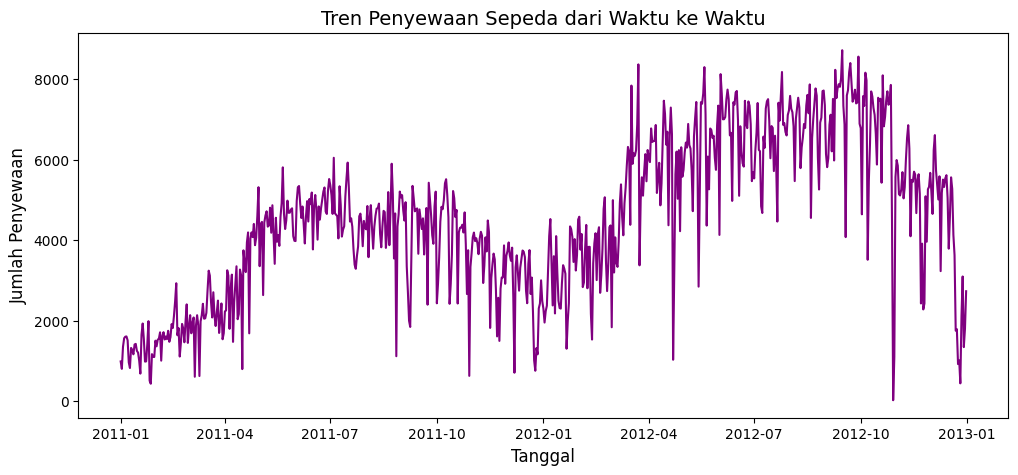

In [24]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=day_df, x="dteday", y="cnt", color="purple")

plt.title("Tren Penyewaan Sepeda dari Waktu ke Waktu", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)

plt.show()


**Insight:**
- Jumlah penyewaan sepeda terus meningkat dari awal 2011 hingga pertengahan 2012, yang menunjukkan bahwa semakin banyak orang mulai menggunakan layanan ini.
- Ada pola naik turun yang kemungkinan dipengaruhi oleh musim atau kondisi cuaca tertentu.
- Menjelang akhir 2012, jumlah penyewaan tiba-tiba menurun cukup drastis. Ini bisa jadi karena musim dingin, perubahan kebiasaan pengguna, atau faktor lainnya.

## Analisis Lanjutan (Opsional) : Pola Penyewaan Sepeda Berdasarkan Jam

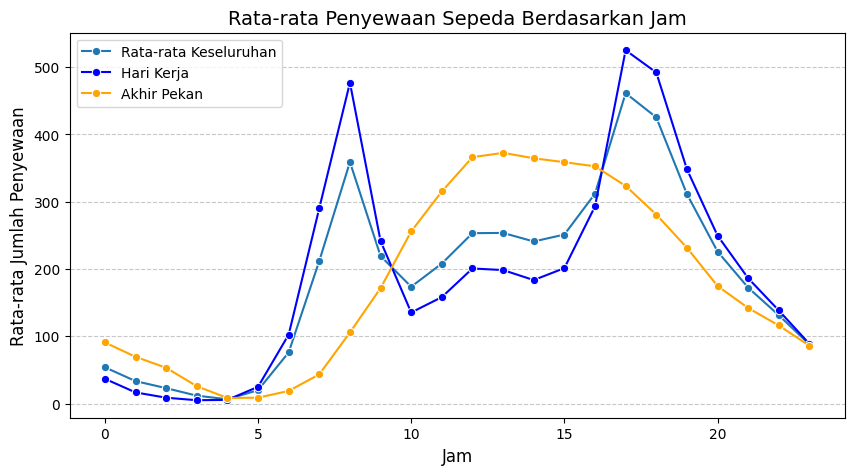

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_df.groupby("hr")[["cnt"]].mean().reset_index(), x="hr", y="cnt", marker="o", label="Rata-rata Keseluruhan")

sns.lineplot(data=hour_df[hour_df["workingday"] == 1].groupby("hr")[["cnt"]].mean().reset_index(), x="hr", y="cnt", marker="o", label="Hari Kerja", color="blue")
sns.lineplot(data=hour_df[hour_df["workingday"] == 0].groupby("hr")[["cnt"]].mean().reset_index(), x="hr", y="cnt", marker="o", label="Akhir Pekan", color="orange")

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


**Insight:**
- Terlihat pada line chart bahwa jumlah penyewaan sepeda pada hari kerja mengalami dua puncak tajam, yaitu pada pukul 08:00 dan 17:00, yang menandakan bahwa sepeda banyak digunakan untuk perjalanan kerja atau sekolah.
- Sebaliknya, pada akhir pekan, pola penyewaan lebih merata sepanjang hari tanpa lonjakan signifikan.

## Conclusion

- Jumlah penyewaan sepeda paling rendah terjadi di musim semi. Hal ini kemungkinan disebabkan oleh cuaca yang kurang mendukung, seperti curah hujan yang lebih tinggi atau suhu yang lebih dingin. Sebaliknya, musim panas dan gugur menjadi periode dengan jumlah penyewaan tertinggi, menunjukkan bahwa kondisi cuaca yang lebih hangat dan stabil mendorong lebih banyak orang untuk menggunakan sepeda.
- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini menunjukkan bahwa sebagian besar pengguna menggunakan sepeda sebagai moda transportasi utama untuk bekerja atau beraktivitas sehari-hari. Sebaliknya, pada hari libur, jumlah penyewaan menurun, tetapi masih ada aktivitas penyewaan, yang kemungkinan besar untuk keperluan rekreasi atau aktivitas santai.
- Terdapat perbedaan yang signifikan antara jumlah penyewa casual dan terdaftar. Penyewa terdaftar jauh lebih banyak dibandingkan penyewa casual, yang menunjukkan bahwa pengguna terdaftar lebih cenderung menggunakan layanan sepeda secara konsisten. Hal ini mungkin karena mereka memiliki akses yang lebih mudah dan mendapatkan keuntungan seperti diskon atau promo.
- Secara umum, jumlah penyewaan sepeda meningkat dari awal 2011 hingga pertengahan 2012, menunjukkan tren positif dalam penggunaan layanan sepeda. Namun, menjelang akhir 2012, terjadi penurunan signifikan yang kemungkinan besar dipengaruhi oleh musim dingin, faktor cuaca, atau kebijakan tertentu yang mempengaruhi jumlah penyewa.